In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/PCOS/clean_data.csv")

In [ ]:
X = df.drop(['PCOS (Y/N)'], axis=1)

y = df['PCOS (Y/N)']

In [ ]:
X.shape

(534, 6)

In [ ]:
y.shape

(534,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((427, 6), (107, 6))

In [ ]:
cols = X_train.columns

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# 12. Run SVM with default hyperparameters 

#Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8879


In [ ]:
# Run SVM with linear kernel and C=1.0
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8972


In [ ]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9157
Test set score: 0.8972


In [ ]:
# The training-set accuracy score is 0.9157 while the test-set accuracy to be 0.8972. 
# These two values are quite comparable. So, there is no question of overfitting.

In [ ]:
# Run SVM with polynomial kernel and C=1.0
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9065


In [ ]:
print('Training set score: {:.4f}'.format(poly_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(poly_svc.score(X_test, y_test)))

Training set score: 0.9321
Test set score: 0.9065


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[69  2]
 [ 8 28]]

True Positives(TP) =  69

True Negatives(TN) =  28

False Positives(FP) =  2

False Negatives(FN) =  8


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        71
           1       0.93      0.78      0.85        36

    accuracy                           0.91       107
   macro avg       0.91      0.87      0.89       107
weighted avg       0.91      0.91      0.90       107



In [ ]:
sensitivity=cm[0,0]/(cm[1,0]+cm[0,0])
print(sensitivity)

0.8961038961038961


In [ ]:
specificity = cm[1,1] / (cm[1,1]+cm[0,1])
print(specificity)

0.9333333333333333


In [ ]:
# Run SVM with sigmoid kernel and C=1.0
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8692


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[69  2]
 [ 9 27]]

True Positives(TP) =  69

True Negatives(TN) =  27

False Positives(FP) =  2

False Negatives(FN) =  9


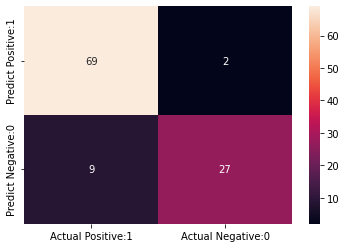

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True)

In [ ]:
# Classification report for Poly Kernel
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        71
           1       0.93      0.75      0.83        36

    accuracy                           0.90       107
   macro avg       0.91      0.86      0.88       107
weighted avg       0.90      0.90      0.89       107

